In [1]:
library(fma)

ds <- ibmclose

Loading required package: tseries
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



# QUESTION 2

## ANSWER FOR 2a)
### Time Series Plot
Not much can be seen from this plot. Finding seasonality is difficult because there is no easily seen correlation to calendar days since the frequency is consecutive stock days.

* Trend - I don't observe any trend
* Seasonality - doesn't seem to be any seasonality, but difficult to tell because of the nature of the data
* Cycle - don't really see any cycles

The whole problem with all of this is that we really don't know what time frame this data represents it is just stock days. Also, we don't know what was going on with IBM or the overall market with this data. Is this during a time of huge fluctuation or was the general market very stable during this time? Did IBM have any major announcements during this time?

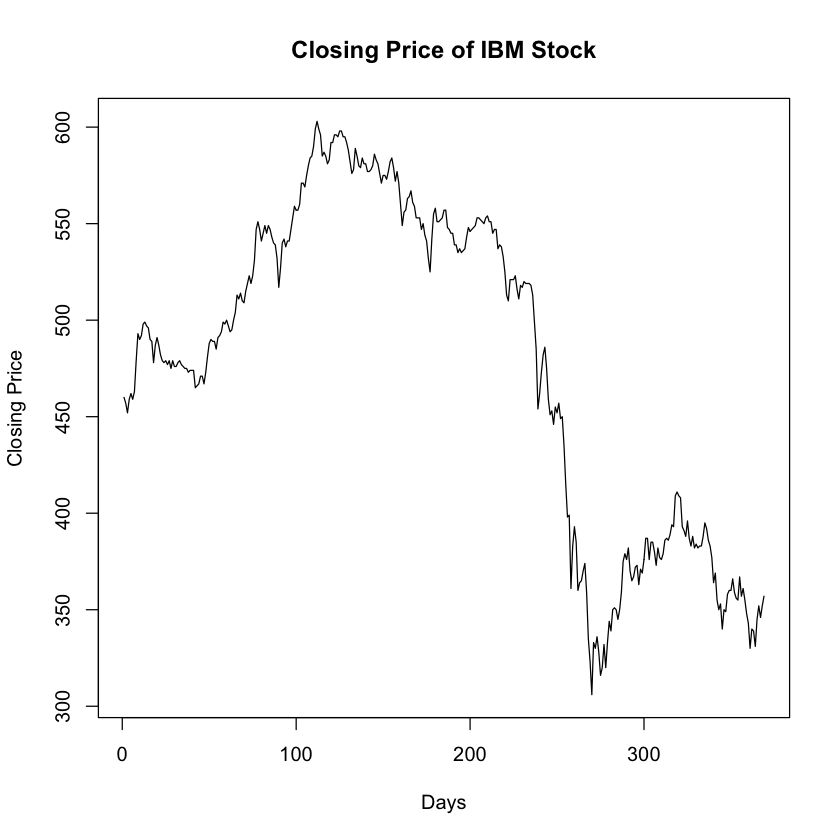

In [2]:
plot(ds, main="Closing Price of IBM Stock", xlab="Days", ylab="Closing Price")

### First Lag Plot
The lag plot here plots a stock day against the previous day. It is very linear so I am guessing that this has some sort of signifance that we will learn about. I googled this to see if I could learn about it, I still don't quite understand the significance yet.

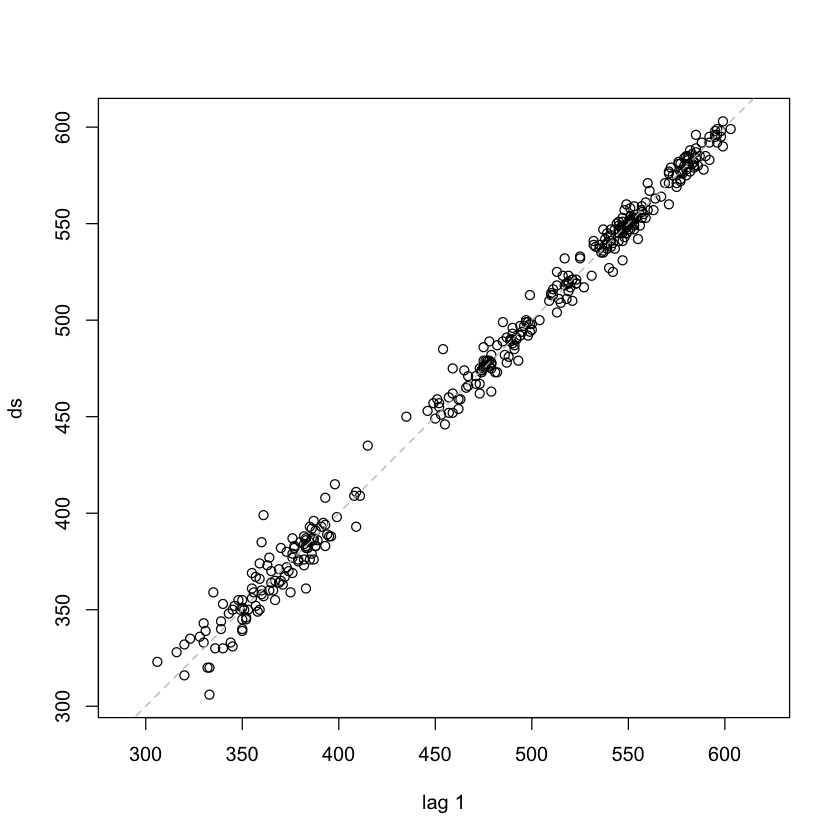

In [3]:
lag.plot(ds, lags=1)

## ANSWERS FOR 2b) & 2c)
If we want to just go with this data ignoring that we don't really understand it, then choosing first 300 at first seems to be ok because it includes the huge downward swing.

Visually I would give Drift the best rating because it follows the general direction of the actual data, but it is pretty coincidental. Based on the accuracy numbers, Naive & Seasonal are the best.

When we see the results for split of 250/119, it looks terrible.

Criteria I am using to decide which forecasting model has the best fit is purely a visual one. Drift follows the general trend of the actual test set. The result for seasonal forecast also show that there is no seasonality since it is just a straight line.

### 2c) for 300/69 split

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

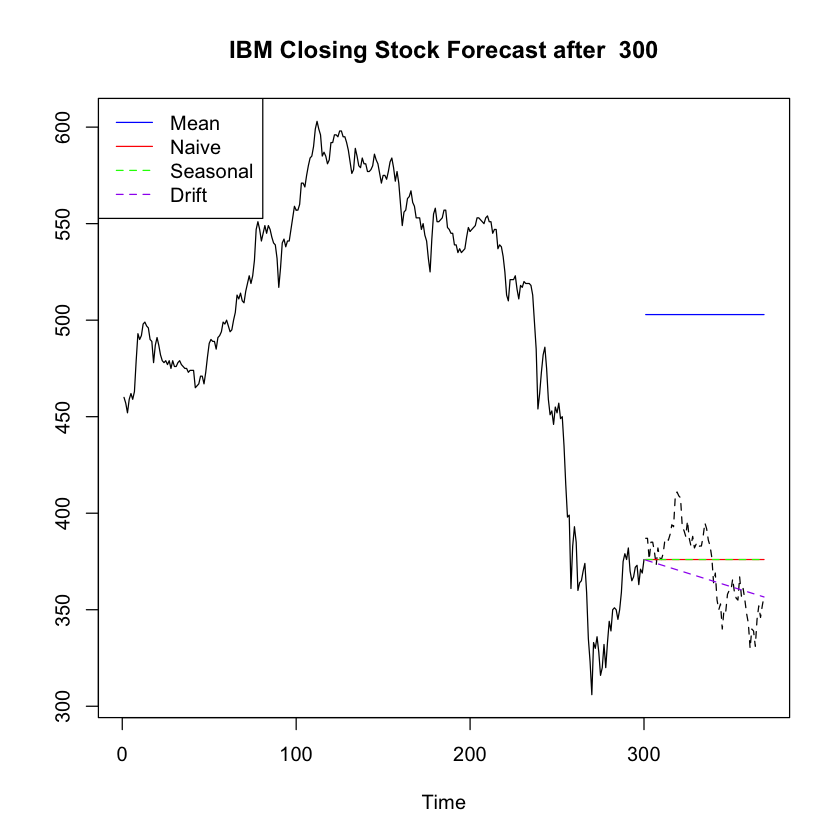

In [7]:
ds <- ibmclose
split = 300
hsize = length(ds) - split
title = paste("IBM Closing Stock Forecast after ", toString(split))

# split the set up along the user supplied number
train <- window(ds, start=1, end=split)
test <- window(ds, start=split + 1, end=length(ds))

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot results
ts.plot(train
        , test
        , plot.type="single"
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

In [12]:
forecast

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: forecast?
   ^


### Accuracy for 300/69 split

In [155]:
print("MEAN")
accuracy(train_mean, test)
print("NAIVE")
accuracy(train_naive, test)
print("SEASONAL")
accuracy(train_seasonal, test)
print("DRIFT")
accuracy(train_drift, test)

[1] "NAIVE"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2809365,7.302815,5.09699,-0.08262872,1.115844,1.000000,0.1351052,NA
Test set,-3.7246377,20.248099,17.02899,-1.29391743,4.668186,3.340989,0.9314689,2.973486


[1] "SEASONAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2809365,7.302815,5.09699,-0.08262872,1.115844,1.000000,0.1351052,NA
Test set,-3.7246377,20.248099,17.02899,-1.29391743,4.668186,3.340989,0.9314689,2.973486


[1] "DRIFT"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.870480e-14,7.297409,5.127996,-0.02530123,1.121650,1.006083,0.1351052,NA
Test set,6.108138e+00,17.066963,13.974747,1.41920066,3.707888,2.741765,0.9045875,2.361092


## 2c) for 250/159 split

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

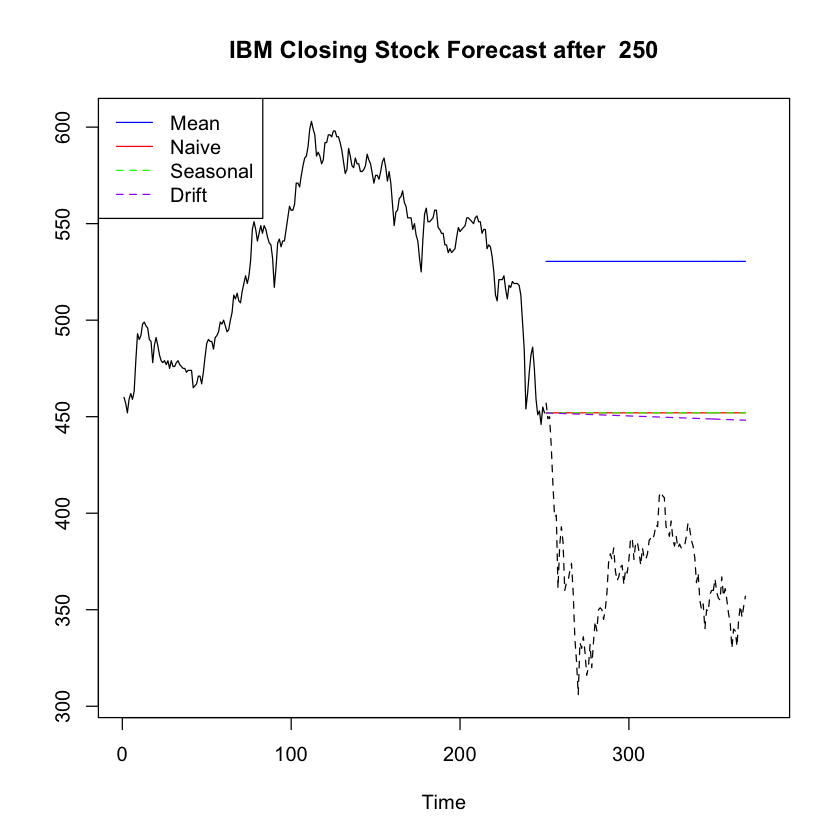

In [151]:
ds <- ibmclose
title = paste("IBM Closing Stock Forecast after ", toString(split))
split = 250
hsize = length(ds) - split

# split the set up along the user supplied number
train <- window(ds, start=1, end=split)
test <- window(ds, start=split + 1, end=length(ibm))

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot results
ts.plot(train
        , test
        , plot.type="single"
        , xlim=c(1, 380)
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

### Accuracy for 250 split

In [178]:
print("MEAN")
accuracy(train_mean, test)
print("NAIVE")
accuracy(train_naive, test)
print("SEASONAL")
accuracy(train_seasonal, test)
print("DRIFT")
accuracy(train_drift, test)

[1] "MEAN"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.480763e-15,12.138802,9.498898,-6.120182,20.30851,1.119163,0.8661515,NA
Test set,4.051587e+00,9.216133,7.850759,5.074990,13.75973,0.924979,0.5095178,1.13105


[1] "NAIVE"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01593625,6.289813,4.988048,-0.7800232,9.880157,0.5876934,0.1829708,NA
Test set,5.00000000,9.670664,8.304348,6.8080182,14.381673,0.9784210,0.5095178,1.179633


[1] "SEASONAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1375000,10.576113,8.4875,-2.1016380,17.63375,1.0000000,0.838108,NA
Test set,0.3043478,6.160886,5.0000,-0.7312374,9.12828,0.5891016,0.224307,0.8031005


[1] "DRIFT"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.377739e-15,6.289793,4.987730,-0.7474544,9.87819,0.5876560,0.1829708,NA
Test set,5.191235e+00,9.761548,8.393037,7.1599507,14.50303,0.9888703,0.5083059,1.188562


# QUESTION 3

## ANSWER FOR 3a)
### Time Series Plot

The data makes sense, we know the real calendar time frame of the data so we can see what was going on in the market. The biggest problem I see is that this represents a bunch of different geographical areas. We know that the housing market is very dependent on geo.

* Trend - There is no single upward or downward overall trend
* Seasonality - definitely see Seasonality, starts low goes up in the spring/summer and then back down.
* Cycle - don't really see any cycles

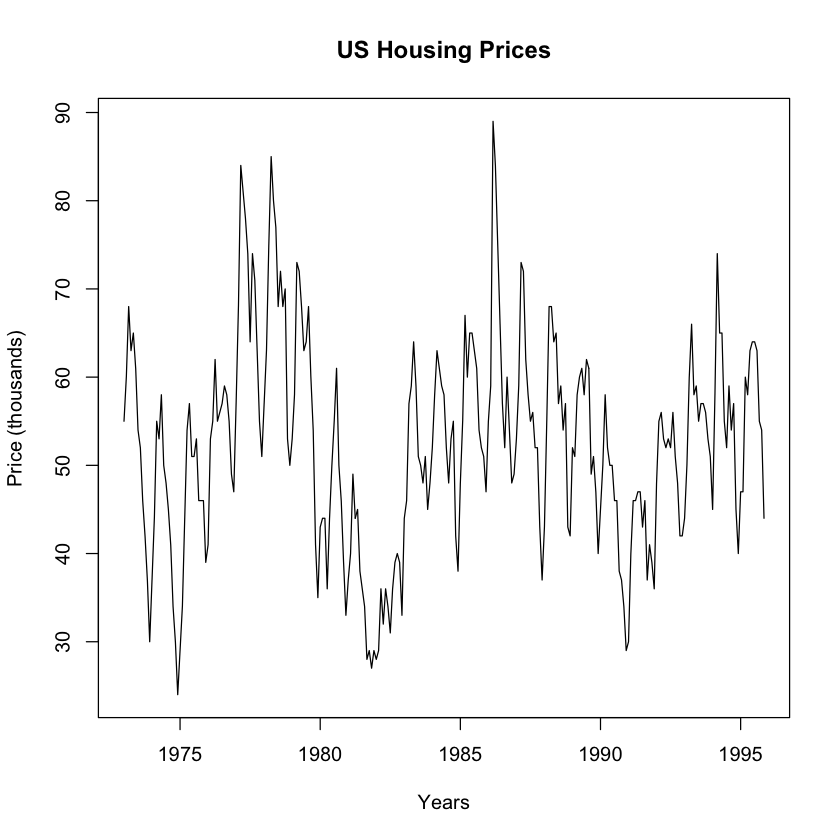

In [179]:
plot(house, main="US Housing Prices", xlab="Years", ylab="Price (thousands)")

## ANSWER FOR 3b)
Using just the last 2 years of this dataset for test is probably a bit small, 10%. I would use a a little bit bigger set, 20%, just to make sure the testing isn't overfitting (is this even a thing in forecasting???)

## ANSWER FOR 3c)

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

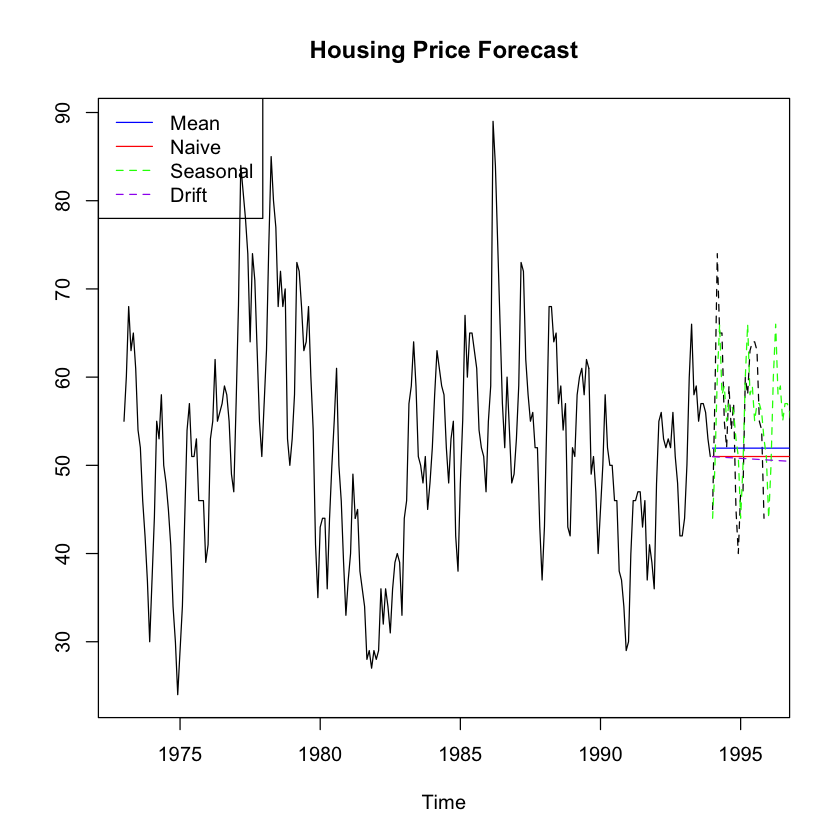

In [185]:
# SETUP TEST/TRAIN
ds <- hsales
title = paste("Housing Price Forecast")
hsize = length(test)

# split the set up along the user supplied number
train <- window(ds, start=c(1973,1), end=c(1993,12))
test <- window(ds , start=c(1994,1))

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot results
ts.plot(train
        , test
        , plot.type="single"
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

## Plot just the forecast models vs the Actual to see how they did

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

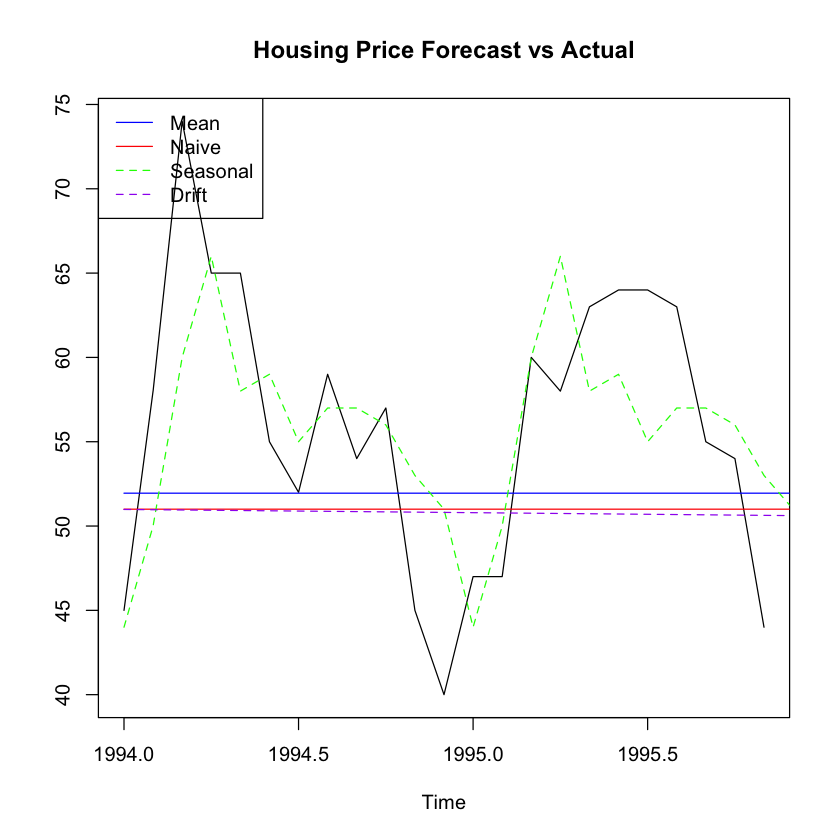

In [186]:
ts.plot(test
        , plot.type="single"
        , main="Housing Price Forecast vs Actual"
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

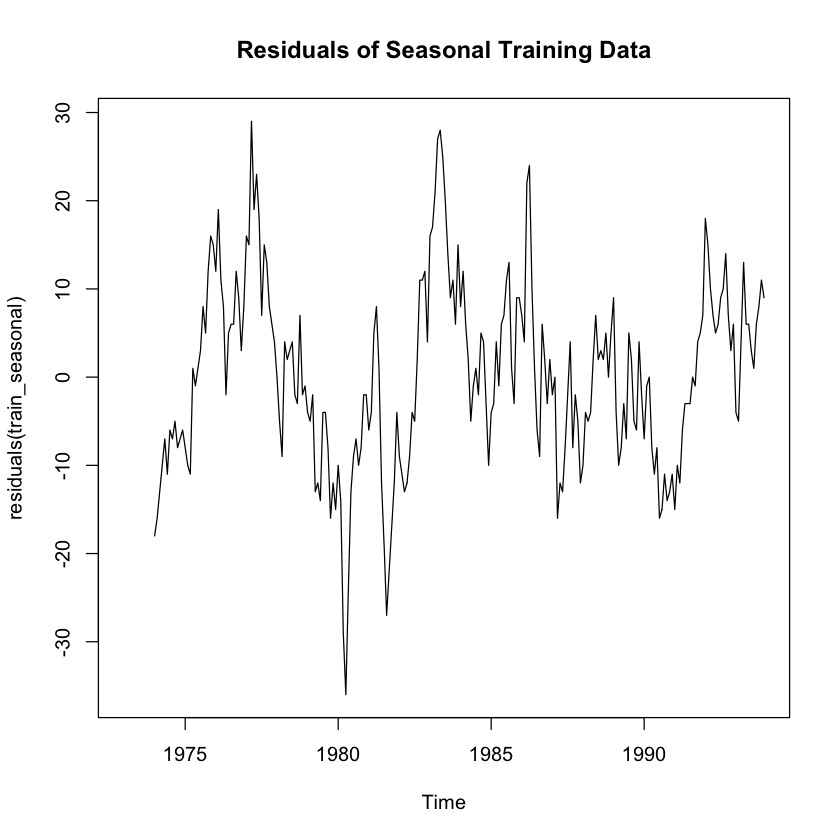

In [187]:
plot(residuals(train_seasonal), main="Residuals of Seasonal Training Data")

In [188]:
print("MEAN")
accuracy(train_mean, test)
print("NAIVE")
accuracy(train_naive, test)
print("SEASONAL")
accuracy(train_seasonal, test)
print("DRIFT")
accuracy(train_drift, test)

[1] "MEAN"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.480763e-15,12.138802,9.498898,-6.120182,20.30851,1.119163,0.8661515,NA
Test set,4.051587e+00,9.216133,7.850759,5.074990,13.75973,0.924979,0.5095178,1.13105


[1] "NAIVE"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01593625,6.289813,4.988048,-0.7800232,9.880157,0.5876934,0.1829708,NA
Test set,5.00000000,9.670664,8.304348,6.8080182,14.381673,0.9784210,0.5095178,1.179633


[1] "SEASONAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1375000,10.576113,8.4875,-2.1016380,17.63375,1.0000000,0.838108,NA
Test set,0.3043478,6.160886,5.0000,-0.7312374,9.12828,0.5891016,0.224307,0.8031005


[1] "DRIFT"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.377739e-15,6.289793,4.987730,-0.7474544,9.87819,0.5876560,0.1829708,NA
Test set,5.191235e+00,9.761548,8.393037,7.1599507,14.50303,0.9888703,0.5083059,1.188562


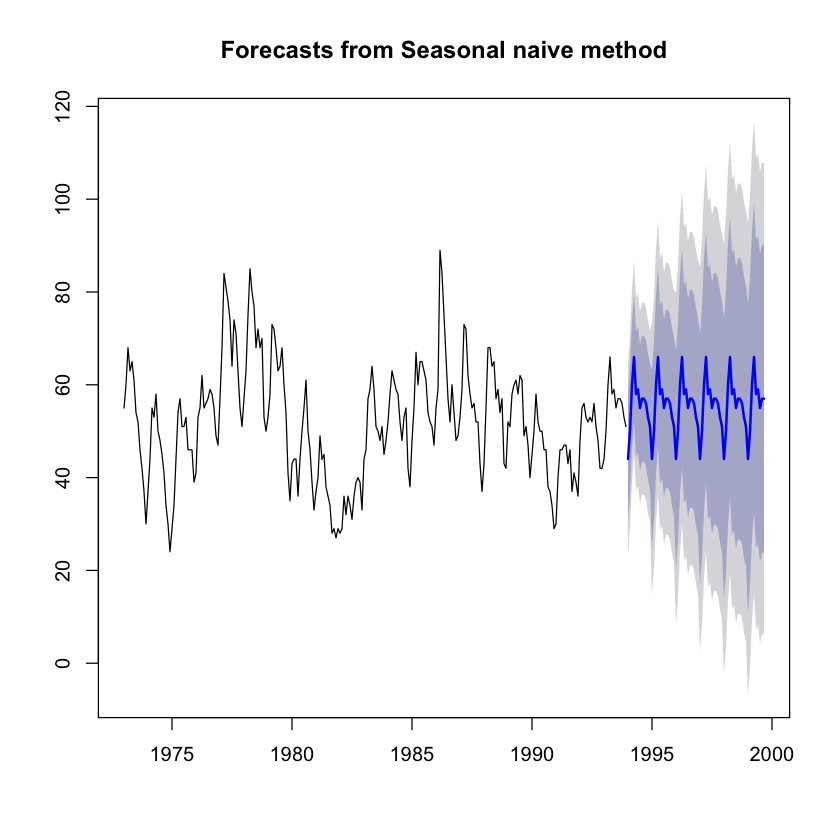

In [191]:
plot.forecast(train_seasonal)